In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TRATAMENTO DE DADOS INICIAL

Nessa etapa inicial, o objetivo é fazer alguns ajustes no dataframe, identificar o formato das variáveis, realizar uma análise exploratória e validar quais features irão ser usadas para o modelo.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/iararegina/datathon_postech/main/dataset-2020.csv', sep=',', encoding='utf-8')

In [ ]:
data.head(3)

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,FASE_2020,TURMA_2022,PONTO_VIRADA_2020,INDE_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,2,H,Não,"7,80",Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,"8,50","8,70","7,50","7,00","5,90","7,70","10,00"
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,3,H,Não,"7,80",Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,"7,92","8,90","7,50","5,50","8,00","8,10","10,00"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object
 1   NOME                           1349 non-null   object
 2   FASE_2020                      728 non-null    object
 3   TURMA_2022                     728 non-null    object
 4   PONTO_VIRADA_2020              702 non-null    object
 5   INDE_2020                      727 non-null    object
 6   PEDRA_2020                     728 non-null    object
 7   DESTAQUE_IEG_2020              728 non-null    object
 8   DESTAQUE_IDA_2020              728 non-null    object
 9   DESTAQUE_IPV_2020              703 non-null    object
 10  IAA_2020                       727 non-null    object
 11  IEG_2020                       727 non-null    object
 12  IPS_2020                       727 non-null    object
 13  IDA

In [ ]:
data.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'FASE_2020', 'TURMA_2022',
       'PONTO_VIRADA_2020', 'INDE_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020'],
      dtype='object')

In [ ]:
# Exclusão de algumas colunas desnecessárioas e reordenação
colunas_excluir = ['TURMA_2022', 'FASE_2020']
data = data.drop(columns=colunas_excluir, axis=1)

# Reordenando as colunas
ordem_colunas = ['NOME', 'INSTITUICAO_ENSINO_ALUNO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020', 'DESTAQUE_IDA_2020',
                 'DESTAQUE_IPV_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020',
                 'IPV_2020', 'IAN_2020', 'PONTO_VIRADA_2020']
data = data[ordem_colunas]

# Removendo a coluna 'NOME'
data = data.drop(columns=['NOME'])

KeyError: "['TURMA_2022', 'FASE_2020'] not found in axis"

In [ ]:
data.describe()

,INSTITUICAO_ENSINO_ALUNO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,INDE_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,PONTO_VIRADA_2020
count,728,728,728,728,703,727,727,727,727,727,727,727,727,702
unique,8,5,5,5,2,76,34,89,13,70,53,129,3,3
top,Escola Pública,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,"8,30","9,00","10,00","7,50","10,00","8,00","7,70","10,00",Não
freq,598,336,476,404,368,35,123,87,396,73,73,52,359,607


In [ ]:
data['PONTO_VIRADA_2020'].value_counts()

PONTO_VIRADA_2020
Não      607
Sim       94
D9600      1
Name: count, dtype: int64

In [ ]:
data['PEDRA_2020'].value_counts()

PEDRA_2020
Ametista    336
Ágata       171
Quartzo     128
Topázio      92
D9891/2A      1
Name: count, dtype: int64

In [ ]:
data['DESTAQUE_IDA_2020'].value_counts()

DESTAQUE_IDA_2020
Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações,    404
Seu destaque em 2020: As suas boas notas na Passos Mágicos,           299
Seu destaque em 2020: As suas boas notas na Faculdade,                 20
Ponto a melhorar em 2021: As suas notas na Faculdade,                   4
D302                                                                    1
Name: count, dtype: int64

In [ ]:
data['DESTAQUE_IEG_2020'].value_counts()

DESTAQUE_IEG_2020
Seu destaque em 2020: A sua boa entrega das lições de casa,                        476
Ponto a melhorar em 2021: Melhorar a sua entrega de lições de casa,                227
Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado,              12
Ponto a melhorar em 2021: Melhorar o seu engajamento nas ações de voluntariado,     12
D301                                                                                 1
Name: count, dtype: int64

In [ ]:
data['DESTAQUE_IPV_2020'].value_counts()

DESTAQUE_IPV_2020
Ponto a melhorar em 2021: Integrar-se mais aos Princípios Passos Mágicos,    368
Seu destaque em 2020: A sua boa integração aos Princípios Passos Mágicos,    335
Name: count, dtype: int64

ANÁLISE EXPLORATÓRIA

Na análise exploratória, queremos identificar e entender como se comportam um pouco das vaviáveis. Por isso buscamos realizar algumas análises:
    
- Identificar a distribuição das variáveis numéricas
- Entender a quantidade das variáveis categóricas
- Visualizar a correlação entre as variáveis numéricas
- Entender a relação entre cada variável numérica com o ponto de virada (que será nossa variável target)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.show()

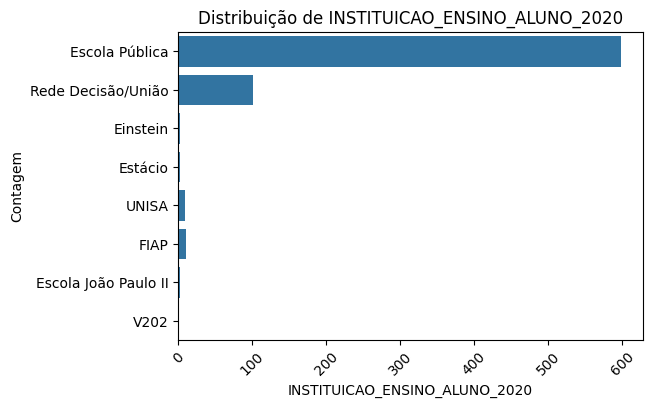

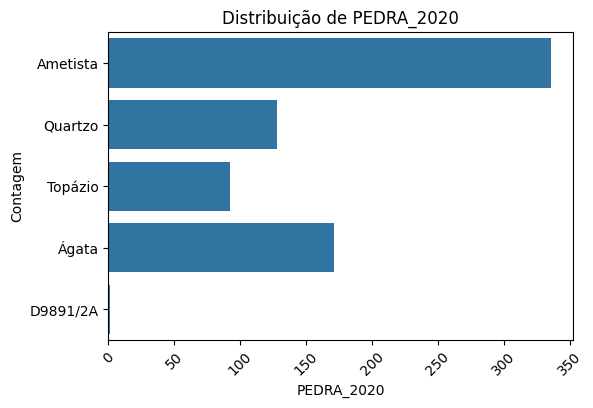

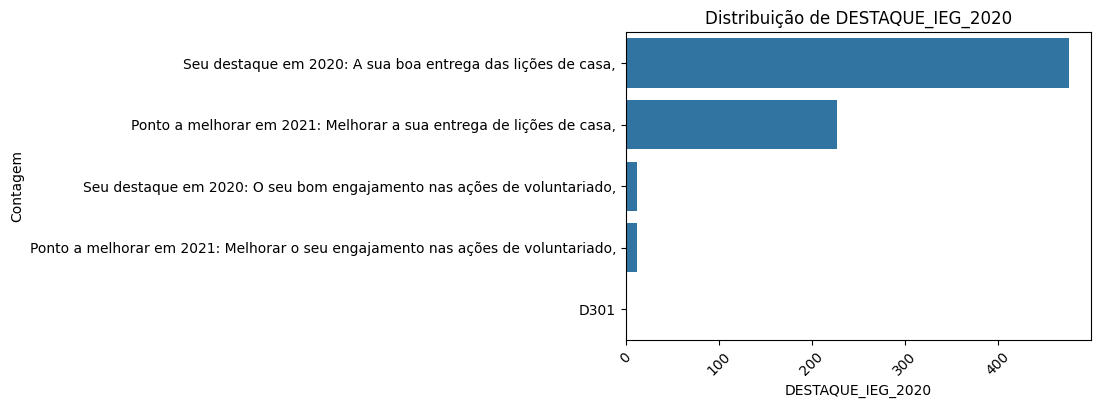

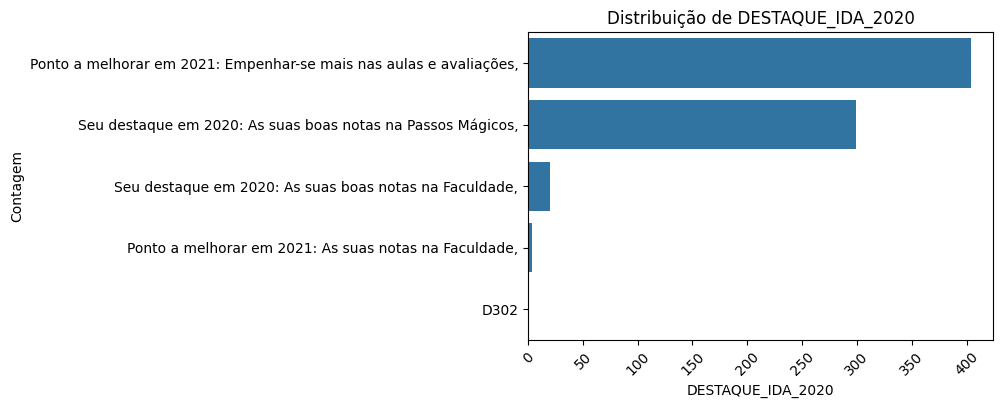

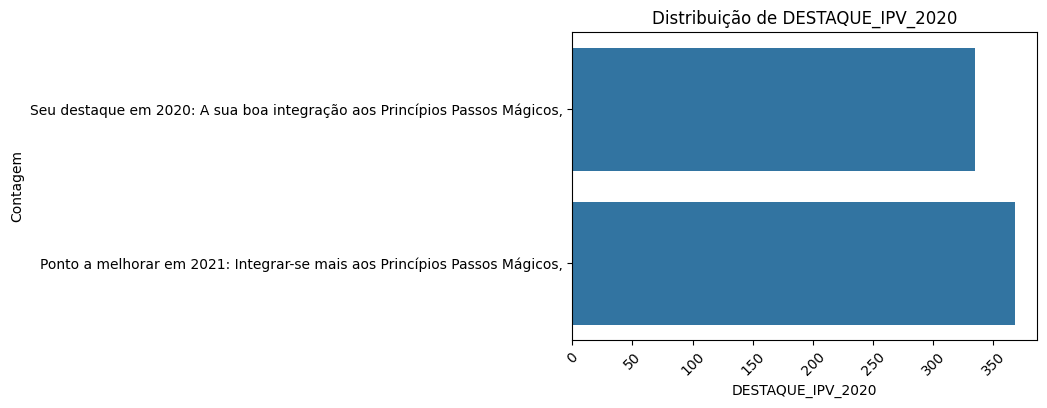

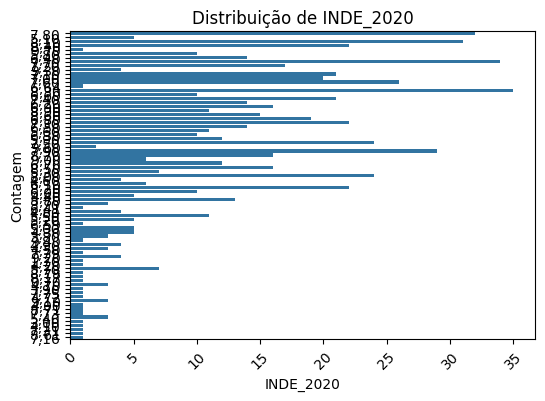

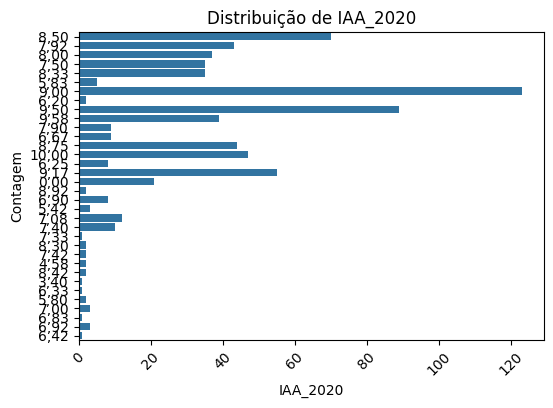

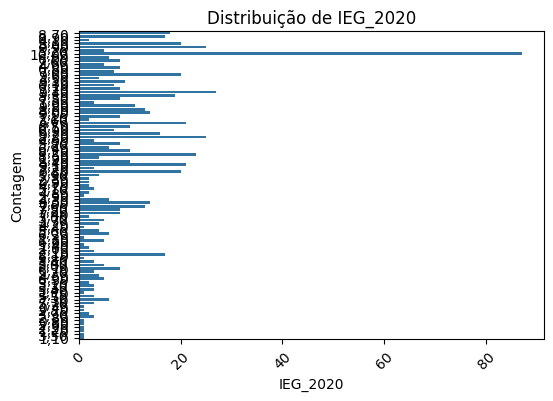

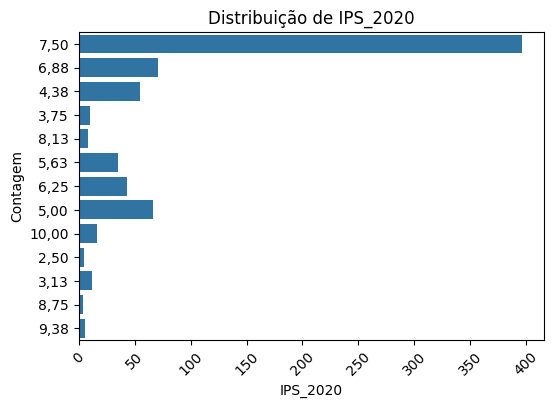

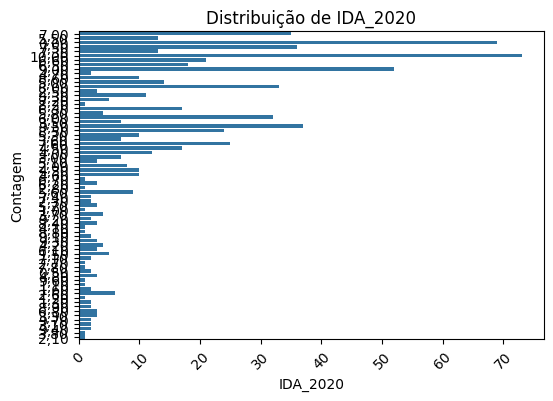

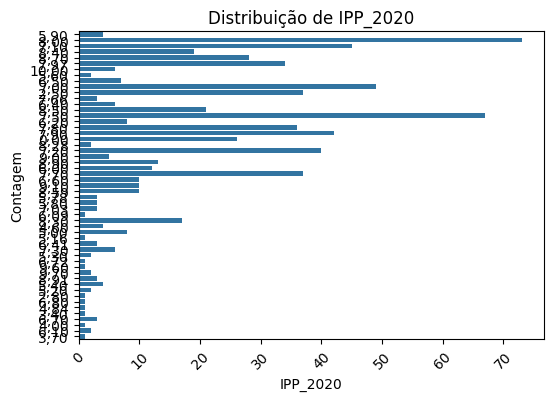

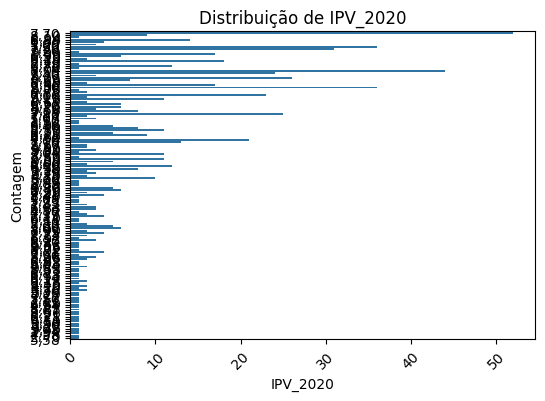

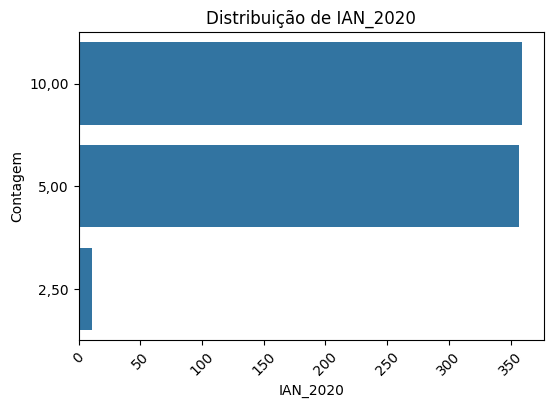

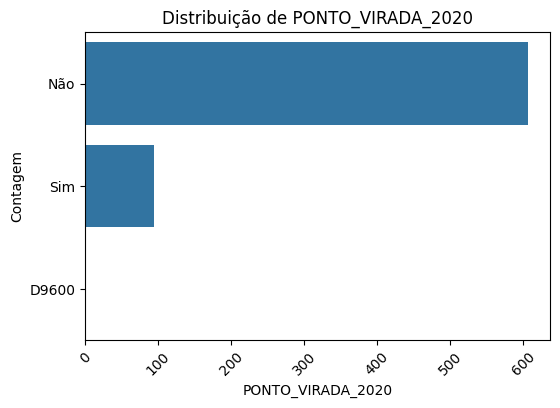

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data[feature])
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: 'Escola Pública'

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=feature, y='PONTO_VIRADA_2020', hue='PONTO_VIRADA_2020')
    plt.title(f'Relação entre {feature} e PONTO_VIRADA_2020')
    plt.xlabel(feature)
    plt.ylabel('PONTO_VIRADA_2020')
    plt.show()

PRÉ PROCESSAMENTO DO DATA FRAME PARA O MODELO

Nessa etapa, já tento escolhido quais seriam as features usadas para o modelo, realizamos o pre processamento ja dentro de uma pipeline. Identificamos que algumas coisas precisariam serem feitas, como a transformação das variaveis categóricas em numéricas usando o label enconder, a padronização das escalas de todas as variaveis utilizando standartscaler e também o balanceamento de carga com o SMOTE, pois notamos que existiam muito mais ocorrencias de "sim" para o ponto de virada do que de "não".

Tudo isso foi inserido em uma pipeline para ser posteriomente usada na aplicação do streamlit.

In [ ]:
# Mapear a variável target para valores numéricos
data['PONTO_VIRADA_2020'] = data['PONTO_VIRADA_2020'].map({'Sim': 1, 'Não': 0})

# Dividir os dados em features (X) e variável alvo (y)
X = data.drop('PONTO_VIRADA_2020', axis=1)
y = data['PONTO_VIRADA_2020']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento dos dados
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['int32']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', LabelEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
import numpy as np

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Verifique a distribuição das classes em y_train
class_distribution = Counter(y_train)

# Verifique se há amostras suficientes em ambas as classes
if len(class_distribution) < 2 or min(class_distribution.values()) < 2:
    print("Não há amostras suficientes para aplicar o SMOTE.")
else:
    # Aplique o SMOTE apenas se houver amostras suficientes
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

Não há amostras suficientes para aplicar o SMOTE.


In [ ]:
# Aplicar SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by SMOTE.

TREINAMENTO E PREVISÃO

Após realizar o pré-processamento, fizemos já o treinamento do modelo com a previsão. Colocamos também dentro da pipeline para retornar alguns indicadores de eficiência e acurácia do modelo.

In [ ]:
# Treinamento do modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test_preprocessed)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

ValueError: could not convert string to float: 'Escola Pública'

EXTRAS


Antes de colocar o modelo na pipeline, fizemos etapa por etapa do pre processamento, treinamento, previsão e indicadores de eificiência do modelo separado, deixo abaixo o codigo comentado separado para a visualização:

In [ ]:
# #transforamção das variaveis categoricas em numericas
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# columns_to_encode = ['INSTITUICAO_ENSINO_ALUNO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020', 'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020']
# for column in columns_to_encode:
#     data[column] = label_encoder.fit_transform(data[column])
# data['PONTO_VIRADA_2020'] = data['PONTO_VIRADA_2020'].map({'Sim': 1, 'Não': 0})

# from sklearn.preprocessing import StandardScaler
# features_to_scale = data.columns.drop('PONTO_VIRADA_2020')
# scaler = StandardScaler()
# data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


# #padronização da escala

# from sklearn.preprocessing import StandardScaler
# features_to_scale = data.columns.drop('PONTO_VIRADA_2020')
# scaler = StandardScaler()
# data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# #balenceamento
# from imblearn.over_sampling import SMOTE
# X = data.drop('PONTO_VIRADA_2020', axis=1)
# y = data['PONTO_VIRADA_2020']
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X, y)
# y_balanced.value_counts()

# #divisão do modelo em treino e teste, aplicando o modelo e fazendo as previsões
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
# logistic_regression_model = LogisticRegression()
# logistic_regression_model.fit(X_train, y_train)
# y_pred = logistic_regression_model.predict(X_test)


# #avaliação do desempenho: encontramos indicadores de desempenho e contruimos a curva de aprendizado

# accuracy = accuracy_score(y_test, y_pred)
# classification_report(y_test, y_pred)
# confusion_matrix(y_test, y_pred)

# from sklearn.model_selection import learning_curve

# def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     """
#     Função para plotar a curva de aprendizado de um modelo.

#     Parâmetros:
#         estimator : objeto do modelo
#         X : array-like, formato (n_samples, n_features)
#             Matriz de features.
#         y : array-like, formato (n_samples) ou (n_samples, n_features)
#             Vetor alvo.
#         ylim : tuple, formato (ymin, ymax), opcional
#             Limites do eixo y.
#         cv : int, cross-validation generator, opcional
#             Estratégia de cross-validation.
#         n_jobs : int ou None, opcional
#             Número de trabalhos a serem executados em paralelo.
#         train_sizes : array-like, formato (n_ticks,), opcional
#             Tamanhos de treinamento relativos a todo o dataset.
#     """
#     plt.figure()
#     plt.title("Curva de Aprendizado")
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Tamanho do Conjunto de Treinamento")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Score no Treinamento")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Score no Teste")

#     plt.legend(loc="best")
#     return plt


# plot_learning_curve(logistic_regression_model, X_balanced, y_balanced, cv=5)
# plt.show()

# from sklearn.metrics import precision_score, recall_score, f1_score


# y_train_pred = logistic_regression_model.predict(X_train)
# y_test_pred = logistic_regression_model.predict(X_test)
# precision_train = precision_score(y_train, y_train_pred)
# recall_train = recall_score(y_train, y_train_pred)
# f1_train = f1_score(y_train, y_train_pred)
# precision_test = precision_score(y_test, y_test_pred)
# recall_test = recall_score(y_test, y_test_pred)
# f1_test = f1_score(y_test, y_test_pred)